Course: BUDT704  
Section: 0502  
Group: 13 **Ohh Shoot!**  
Team: Vinya Dengre, Meet Doshi, Surya Kaniamudhan, Rashi Madnani, Srishti Shirgavi, Jing Wang, Akshar Yadav  
Date: December 06,2022
# The NYC Gunshot Story

## Introduction

Welcome to New York! Here, the term oh shoot! is used more frequently for a gunshot than a mistake. Gun violence is a crime that is causing significant worry not only in NYC but also across America and even around our campus. A nonchalant attitude toward such a terrible act affects the physical, emotional, and mental health of society, and the effects extend well beyond the individuals involved in the crime. It has an impact on a number of businesses, real estate values, healthcare expenses, and the overall economy, and it poses issues with the licensing rules for firearms. When we learn about such news via UMD notifications, we likewise dread it. Thus, in order to better comprehend the statistics, we chose to analyze gun violence in NYC.

We will be using 2006 to 2021 NYC Gunshot data in order to study and respond to numerous inquiries pertaining to the Societies, Governments, and other businesses that are affected. 

- With the aid of our analysis, the government can keep track of the trends in gunfire in New York City and take action to reduce, if not stop, the deterioration of quality of life in such areas.

- It can benefit real estate companies in the planning of their prospective developments in the NYC region by selecting safer neighborhoods as opposed to those that are more likely to experience gun violence.

- This information can be used by the general public and tourists to make informed travel plans in NYC.

- This analysis can help first responders better prepare themselves to treat gunshot victims quickly and effectively to save lives in high-gun violence areas.

### Demographic Information on NYC

- New York city is made up of five boroughs (Bronx, Brooklyn, Manhattan, Staten Island, and Queens)
- US Census information for 2021 shows that the population of New York City was composed of approximately 52% female and 48% male with each borough closely following that same split of male and female residents
-  Across all five boroughs and New York City as a whole, the three races with the highest populations are White (non-Latino), Hispanic or Latino, and Black. The White(non-Latino) population has the highest concentration across all of the five boroughs.
- Over 60% of the population in New York City are between the age of 18 - 64, followed by people under 18 and people aged above 65 account to about ~10% of the population.

Source: https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/PST045221

We have graduated from UMD and are working in a NYC based startup, Oh Shoot!. We are a consulting firm that focuses on providing databacked recommendations for clients. More Americans died of gun-related injuries in the recent years compared to other years on record. We currently are working with two institutions and have asked us to analyze a data set on NYPD Shooting Incidents Data. 

The data set for analysis is available publically on the NYC OpenData website. Each record represents a shooting incident in NYC and includes information about the event, the location and time of occurrence. In addition, information related to suspect and victim demographics is also included. 

Data Source (dataset and geojson): https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

Individual Column Descriptions:
- INCIDENT_KEY: randomly generated Id by the NYPD for each incident. (a shooting incident can have multiple victims involved. Each incident key represents one victim, hence similar incident keys are counted as one incident)
- OCCUR_DATE: exact date of the shooting incident.
- OCCUR_TIME: exact time of the shooting incident.
- BORO: name of the borough where the shooting incident occured.
- PRECINCT: precinct where the shooting incident occured.
- JURISDICTION_CODE: jurisdiction where the shooting incident occured. Here,
    - 0: Patrol
    - 1: Transit
    - 2: Housing
    - 3 and above: Non-NYPD jurisdiction
- LOCATION_DESC: location of the shooting incident.
- STATISTICAL_MURDER_FLAG: shooting resulted in victim's death which would count as a murder.
    - True: murder
    - False: injury not leading to death
- PERP_AGE_GROUP: perpetrator's age within a category.
- PERP_SEX: perpetrator's gender.
- PERP_RACE: perpetrator's race description.
- VIC_AGE_GROUP: victim's age within a category.
- VIC_SEX: victim's gender.
- VIC_RACE: victim's race description.
- X_COORD_CD, Y_COORD_CD: midblock X-coordinate and Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104).
- Latitude, Longitude: GPS co-ordinates where the incident occured.
- Lon_Lat: combination of latitude and longitude.

Our analysis will help derive valuable answers to the following questions and many more:

- What are the trends in shooting incidents over the years in NYC?

- Considering that NYPD is interested in our data analysis and wants to determine if there are any areas that experience shootings where the shooter flees after the incident. What are the insights and recommendations that we can provide to determine the same?

- Which group of people (as determined by gender, age group, and race) are at a higher risk of being a victim of shooting incidents in NYC?

- New York City Council has asked for some recommendations on the basis of spatial facets with high gun violence- What are the socioeconomic factors contributing to high gun violence? In order to curb this problem, what solutions can be recommended?

- What recommendations can we provide to ZeroEyes (a firm that delivers A.I. video gun detection real-time solutions) based on NYC Shooting data? What are the possible locations Zero Eyes can target?

- Based on previous shooting incidents, what is the expected trend in the number of victims for the following years?

## Data Preprocessing

In [1]:
# loading required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import calendar
from urllib.request import urlopen
import json
from plotly.subplots import make_subplots
import statsmodels.api as sm
from numpy import nan as NA
import warnings
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings('ignore')

sns.set_theme(style="darkgrid")

In [2]:
dataset_url = 'https://github.com/ayadav1069/NYC_Gun_Shooting_Repository/blob/b35e72a85313a2abd8e31b09d0e55afa8529c057/2021%20NYPD_Shooting_Incident_Data__Historic_.csv?raw=true'

In [3]:
# importing the datset.
df_nypd_data = pd.read_csv(dataset_url)
df_nypd_data.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME      BORO  PRECINCT  JURISDICTION_CODE  \
0     236168668  11/11/2021   15:04:00  BROOKLYN        79                0.0   
1     231008085  07/16/2021   22:05:00  BROOKLYN        72                0.0   
2     230717903  07/11/2021   01:09:00  BROOKLYN        79                0.0   
3     237712309  12/11/2021   13:42:00  BROOKLYN        81                0.0   
4     224465521  02/16/2021   20:00:00    QUEENS       113                0.0   

  LOCATION_DESC  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
0           NaN                    False            NaN      NaN   
1           NaN                    False          45-64        M   
2           NaN                    False            <18        M   
3           NaN                    False            NaN      NaN   
4           NaN                    False            NaN      NaN   

                  PERP_RACE VIC_AGE_GROUP VIC_SEX                  VIC_RACE  \
0                       NaN         18-24       M                     BLACK   
1  ASIAN / PACIFIC ISLANDER         25-44       M  ASIAN / PACIFIC ISLANDER   
2                     BLACK         25-44       M                     BLACK   
3                       NaN         25-44       M                     BLACK   
4                       NaN         25-44       M                     BLACK   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0    996313.0    187499.0  40.681318 -73.956509   
1    981845.0    171118.0  40.636364 -74.008667   
2    996546.0    187436.0  40.681145 -73.955669   
3   1001139.0    192775.0  40.695792 -73.939096   
4   1050710.0    184826.0  40.673740 -73.760411   

                                        Lon_Lat  
0  POINT (-73.95650899099996 40.68131820000008)  
1  POINT (-74.00866668999998 40.63636384100005)  
2  POINT (-73.95566903799994 40.68114495900005)  
3       POINT (-73.939095905 40.69579171600003)  
4  POINT (-73.76041066999993 40.67374017600008)

In [4]:
# renaming the columns for better understanding.
df_nypd_data.rename(columns = {'INCIDENT_KEY' : 'Incident_Key', 'OCCUR_DATE' : 'Occur_Date', 'OCCUR_TIME' : 'Occur_Time', 'BORO' : 'Borough', 'PRECINCT' : 'Reported_Precinct', 'JURISDICTION_CODE' : 'Jurisdiction_Code', "LOCATION_DESC" : "Location_Description", "STATISTICAL_MURDER_FLAG" : "Murder_Flag", "PERP_AGE_GROUP" : "Perp_Age_Group", "PERP_SEX" : "Perp_Sex", "PERP_RACE" : "Perp_Race",'VIC_AGE_GROUP':'Victim_Age_Group', 'VIC_SEX':'Victim_Sex', 'VIC_RACE':'Victim_Race', 'X_COORD_CD':'X_Coordinate', 'Y_COORD_CD':'Y_Coordinate'}, inplace = True)

Cleaning the "Incident_Key" column. Checking for any missing values in the column.

In [5]:
# checking if there are any missing or NaN values.
df_nypd_data['Incident_Key'].isnull().sum()

0

Cleaning the "Occur_Date" column. Checking for any missing values in the column.

In [6]:
# checking if there are any missing or NaN values.
df_nypd_data['Occur_Date'].isnull().sum()

0

In [7]:
# descriptive analytics of Occur_Date column.
df_nypd_data['Occur_Date'].describe()

count          25596
unique          5409
top       07/05/2020
freq              47
Name: Occur_Date, dtype: object

Cleaning the "Occur_Time" column. Checking for any missing values in the column.

In [8]:
# checking if there are any missing or NaN values.
df_nypd_data['Occur_Time'].isnull().sum()

0

Cleaning the "Borough" column. Checking for unique as well as any missing values in the column.

In [9]:
df_nypd_data['Borough'].unique()

array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

Cleaning the "Reported_Precinct" column. Checking for unique as well as any missing values in the column.

In [10]:
# displaying unique values to make sure that missing values got replaced with -1 and there is no junk data.
df_nypd_data['Reported_Precinct'].unique()

array([ 79,  72,  81, 113,  42,  52,  34,  75,  32,  26,  41,  67,  43,
        63,  48,  69,  73,  28, 109,   7,  40,  14, 100, 120,  44,  70,
        23,  46,  61, 110,  13,  71,  83,  30,  77,  47,  25, 101, 106,
         6,  33, 103, 102,  45,  94,  76,   9,  19, 112, 114,  60, 111,
        90, 123, 115,  49, 105,  84, 107,  66,  24, 121, 108,  62, 122,
        10,  20,  50,  88,  68,  78, 104,  18,   5,  17,   1,  22])

In [11]:
# checking if there are any missing or NaN values. 
df_nypd_data['Reported_Precinct'].isnull().sum()

0

Cleaning the "Jurisdiction_Code" column. Checking for unique as well as any missing values in the column.

In [12]:
df_nypd_data['Jurisdiction_Code'].unique()

array([ 0.,  2.,  1., nan])

We noticed, there were some NaN/missing values in the "Jurisdiction_Code" column. Thus, replacing it with "-1" such that we understand that -1 represents unknown. 

In [13]:
# replacing missing values with -1 to maintain the datatype of the column.
df_nypd_data['Jurisdiction_Code'].fillna(value = -1, inplace = True)
# displaying unique values to make sure that missing values got replaced with -1 and there is no junk data.
df_nypd_data['Jurisdiction_Code'].unique()

array([ 0.,  2.,  1., -1.])

Cleaning the "Location_Description" column. Checking for any missing values in the column.

In [14]:
# checking if there are any missing or NaN values.
df_nypd_data['Location_Description'].isna().sum()

14977

In [15]:
#checking for unique values
df_nypd_data['Location_Description'].unique()

array([nan, 'COMMERCIAL BLDG', 'MULTI DWELL - PUBLIC HOUS',
       'GROCERY/BODEGA', 'MULTI DWELL - APT BUILD', 'BAR/NIGHT CLUB',
       'PVT HOUSE', 'HOSPITAL', 'HOTEL/MOTEL', 'GAS STATION',
       'DEPT STORE', 'BEAUTY/NAIL SALON', 'RESTAURANT/DINER', 'BANK',
       'FAST FOOD', 'DRY CLEANER/LAUNDRY', 'VARIETY STORE', 'NONE',
       'CLOTHING BOUTIQUE', 'SOCIAL CLUB/POLICY LOCATI', 'SMALL MERCHANT',
       'LIQUOR STORE', 'SUPERMARKET', 'SHOE STORE', 'SCHOOL',
       'STORE UNCLASSIFIED', 'CHAIN STORE', 'DRUG STORE',
       'TELECOMM. STORE', 'JEWELRY STORE', 'FACTORY/WAREHOUSE',
       'CANDY STORE', 'ATM', 'GYM/FITNESS FACILITY', 'VIDEO STORE',
       'DOCTOR/DENTIST', 'LOAN COMPANY', 'PHOTO/COPY STORE', 'CHECK CASH',
       'STORAGE FACILITY'], dtype=object)

The Location Description column has the following descrepancies:
- There are two location types with a "-" in between (example: MULTI DWELL - PUBLIC HOUS or MULTI DWELL - APT BUILD): Out of these we only retain the text after the "-".
- There are a few location types with a "/" in between (example: BEAUTY/NAIL SALON or BAR/NIGHT CLUB): Out of these we only retain the text before the "/".

In [91]:
# replacing the NaN values with "Not_Recorded" such that we understand that the location description for those incidents were not recorded.
df_nypd_data['Location_Description'].fillna(value = "Not_Recorded", inplace = True)

In [17]:
# creating a function for splitting the values based on special characters and retaining approporiate values.
def clean_location_desc(loc_desc):
    if '-' in loc_desc: # if there is a "-" in the values, split it and keep the second half.
        try:
            return loc_desc.split('-')[1]
        except IndexError:
            return loc_desc.split('-')[0]
    else: # if there is a "/" in the values, split it and keep the first half.
        try:
            return loc_desc.split('/')[0]
        except IndexError:
            return loc_desc.split('/')[0]

In [18]:
# applying the function defined above on the Location_Description column.
df_nypd_data['Location_Description'] = df_nypd_data['Location_Description'].apply(lambda x: clean_location_desc(x))

Cleaning the "Murder_Flag" column. Checking for unique as well as any missing values in the column.

In [20]:
# checking the unique values in the column.
df_nypd_data['Murder_Flag'].unique()

array([False,  True])

Cleaning the "Perp_Age_Group" column. Checking for unique as well as any missing values in the column.

In [21]:
# checking the unique values in the column.
df_nypd_data['Perp_Age_Group'].unique()

array([nan, '45-64', '<18', '25-44', '18-24', '65+', 'UNKNOWN', '1020',
       '940', '224'], dtype=object)

In [22]:
# renaming categories for better understanding.
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("<18","0-18")
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("65+","65-100")

In [23]:
# replacing unknown, NaN, and errorneous data with "-1" such that we understand that the age of the perpetrator is unknown.
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("UNKNOWN","-1")
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace(np.nan,"-1")
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("1020","-1")
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("940","-1")
df_nypd_data['Perp_Age_Group'] = df_nypd_data['Perp_Age_Group'].replace("224","-1")

In [24]:
# re-checking the unique values in the column.
df_nypd_data['Perp_Age_Group'].unique()

array(['-1', '45-64', '0-18', '25-44', '18-24', '65-100'], dtype=object)

Cleaning the "Perp_Sex" column. Checking for unique as well as any missing values in the column.

In [25]:
# checking the unique values in the column.
df_nypd_data['Perp_Sex'].unique()

array([nan, 'M', 'F', 'U'], dtype=object)

In [26]:
# replacing the NaN values with "U" such that we understand the the perpetrator's gender is unknown.
df_nypd_data['Perp_Sex'] = df_nypd_data['Perp_Sex'].replace(np.nan,"U")

Cleaning the "Perp_Race" column. Checking for unique as well as any missing values in the column.

In [27]:
# checking the unique values in the column.
df_nypd_data['Perp_Race'].unique()

array([nan, 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC',
       'WHITE HISPANIC', 'WHITE', 'UNKNOWN',
       'AMERICAN INDIAN/ALASKAN NATIVE'], dtype=object)

In [28]:
# replacing the NaN values with "UNKNOWN" such that we understand the the perpetrator's race is unknown.
df_nypd_data['Perp_Race'] = df_nypd_data['Perp_Race'].replace(np.nan,"UNKNOWN")

Cleaning the "Victim_Age_Group" column. Checking for unique as well as any missing values in the column.

In [29]:
# checking the unique values in the column
df_nypd_data['Victim_Age_Group'].unique()

array(['18-24', '25-44', '<18', '45-64', '65+', 'UNKNOWN'], dtype=object)

In [30]:
# renaming the categories for better understanding.
df_nypd_data['Victim_Age_Group'] = df_nypd_data['Victim_Age_Group'].replace("<18","0-18")

In [31]:
# replacing unknown with "-1" such that we understand that the victim's age group is not known.
df_nypd_data['Victim_Age_Group'] = df_nypd_data['Victim_Age_Group'].replace("UNKNOWN","-1")

In [32]:
# re-checking the unique values in the column
df_nypd_data['Victim_Age_Group'].unique()

array(['18-24', '25-44', '0-18', '45-64', '65+', '-1'], dtype=object)

Cleaning the "Victim_Sex" column. Checking for unique as well as any missing values in the column.

In [33]:
# checking the unique values in the column
df_nypd_data['Victim_Sex'].unique()

array(['M', 'F', 'U'], dtype=object)

Cleaning the "Victim_Race" column. Checking for unique as well as any missing values in the column.

In [34]:
# checking the unique values in the column
df_nypd_data['Victim_Race'].unique()

array(['BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC',
       'WHITE HISPANIC', 'WHITE', 'AMERICAN INDIAN/ALASKAN NATIVE',
       'UNKNOWN'], dtype=object)

Cleaning the "X_Coordinate", "Y_coodinate", "Latitude", and "Longitude" columns. Checking for any missing values in the column.

In [35]:
# checking for missing values in the columns
df_nypd_data['X_Coordinate'].isna().sum() + df_nypd_data['Y_Coordinate'].isna().sum() + df_nypd_data['Latitude'].isna().sum() + df_nypd_data['Longitude'].isna().sum()

0

We can see that the Longitude and Latitude of the place is specified explicitly in the previous columns. Thus, the column with a comnbination of both gps coordinates as 'Lon_Lat' appears to be redundant. Hence, we drop the "Lon_Lat" column.

In [36]:
# dropping the Lon_Lat column.
df_nypd_data.drop(columns = 'Lon_Lat', inplace = True)

## What are the trends in shooting incidents over the years in NYC?

- It is reported by the Substance Abuse and Mental Health Services Administration that there are three stages that a victim goes through after an incident: “the acute phase immediately after the event, the intermediate phase several days to weeks afterward and the long-term phase”. _Source:https://www.apa.org/monitor/2018/09/survivors_
- Victims of shooting incidents have an increased risk of experiencing lasting mental health problems such as depression, substance abuse and post-traumatic stress.
-  Victims of shooting incidents “become overly confrontational or aggressive, or engage in high-risk behaviors (e.g., driving recklessly, using drugs and alcohol). _Source: https://www.nctsn.org/sites/default/files/resources/psychological_impact_of_the_shooting.pdf_
- While there are proven negative psychological impacts to a surviving victim of a shooting incident as an individual, there are also negative impacts to the public health and safety of the community.
- New York City is one of the most densely populated city in the United States. Despite being heavily populated, there is a surge in population due to the the city’s historical, economic, and cultural impact.

In [37]:
#Calculating the number of incidents by year
df_nypd_data['Year'] = pd.to_datetime(df_nypd_data['Occur_Date']).dt.year
df_nypd_data['Month'] = pd.to_datetime(df_nypd_data['Occur_Date']).dt.month_name()
year_count = df_nypd_data.groupby(['Year'])['Incident_Key'].count()
df_nyc_shooting_count = pd.DataFrame()
df_nyc_shooting_count['Number of incidents'] = year_count

In [38]:
#Grouping by boroughs
df_borough = df_nypd_data.groupby('Borough')
boroughs = df_nypd_data.Borough.unique()

In [39]:
#Assigning each borough to a data frame
df_Brooklyn = df_borough.get_group('BROOKLYN')
df_Queens = df_borough.get_group('QUEENS')
df_Manhattan = df_borough.get_group('MANHATTAN')
df_Bronx = df_borough.get_group('BRONX')
df_StatenIsland = df_borough.get_group('STATEN ISLAND')


In [40]:
df_Overall_count = df_nypd_data['Year'].value_counts()

In [41]:
#Calculating and visulaising incidents by boroughs

#Setting the warning as none, to prevent warning generated by slicing a dataframe
pd.set_option("mode.chained_assignment", None)

df_Brooklyn['Year'] = pd.to_datetime(df_Brooklyn['Occur_Date']).dt.year
brooklyn_count = df_Brooklyn.groupby(['Year'])['Year'].count()

df_Queens['Year'] = pd.to_datetime(df_Queens['Occur_Date']).dt.year
queens_count = df_Queens.groupby(['Year'])['Year'].count().transpose()

df_Manhattan['Year'] = pd.to_datetime(df_Manhattan['Occur_Date']).dt.year
manhattan_count = df_Manhattan.groupby(['Year'])['Year'].count()

df_Bronx['Year'] = pd.to_datetime(df_Bronx['Occur_Date']).dt.year
bronx_count = df_Bronx.groupby(['Year'])['Year'].count()

df_StatenIsland['Year'] = pd.to_datetime(df_StatenIsland['Occur_Date']).dt.year
statenIsland_count = df_StatenIsland.groupby(['Year'])['Year'].count()

x_values = np.arange(2006, 2022, 1)

df_borough_shooting_count = pd.DataFrame()

df_borough_shooting_count['Brooklyn'] = brooklyn_count
df_borough_shooting_count['Queens'] = queens_count
df_borough_shooting_count['Manhattan'] = manhattan_count
df_borough_shooting_count['Bronx'] = bronx_count
df_borough_shooting_count['Staten Island'] = statenIsland_count
df_borough_shooting_count['Overall'] = df_Overall_count

In [42]:
# Creating data where the incident was fatal 
df_fatal = df_nypd_data[df_nypd_data['Murder_Flag'] == True]

# Counting the number of victims affected per incident
df_incident_count = df_fatal.groupby([df_nypd_data.Incident_Key, df_nypd_data.Year]).size().reset_index().rename(columns={0:'count'})
df_incident_count = df_incident_count[df_incident_count['count'] > 2]

# Creating a pivot table based on the year and the count
df_year_count_pivot = df_incident_count.pivot_table(index = 'Year', aggfunc = 'count')
df_year_count_pivot.drop('Incident_Key', axis=1, inplace=True)
df_year_count_pivot.rename(columns = {'count' : 'Number of Mass shootings'}, inplace = True)
df_borough_shooting_count['Mass Shootings'] = df_year_count_pivot['Number of Mass shootings']

In [43]:
# calculating the fatal and non fatal incidents
df_fatal_vs_nonfatal = df_nypd_data.pivot_table(values = 'Incident_Key', index='Year', columns='Murder_Flag', aggfunc='count')
df_fatal_vs_nonfatal.rename(columns = {False : 'Non-Fatal', True : 'Fatal'}, inplace = True)
df_fatal_vs_nonfatal

Murder_Flag  Non-Fatal  Fatal
Year                         
2006              1610    445
2007              1514    373
2008              1597    362
2009              1480    348
2010              1507    405
2011              1566    373
2012              1429    288
2013              1116    223
2014              1215    249
2015              1151    283
2016               985    223
2017               796    174
2018               754    204
2019               783    184
2020              1582    366
2021              1583    428

In [44]:
# Plotting the line incident
figure = px.line(df_borough_shooting_count, x = df_borough_shooting_count.index, y = df_borough_shooting_count.columns)

# Updating the layout, adding the labels and the legends
figure.update_layout(
    title= 'Shooting Trends in each Borough from 2006 to 2021',
    xaxis_title = 'Number of Incidents',
    yaxis_title = 'Year',
    legend_title = 'Boroughs',
    font = dict(
        family = 'Courier New, monospace',
        size = 18,
        color = 'RebeccaPurple'
    )
)

figure.update_layout(autosize=True)
figure.show()

In the line visualization above, we can see that the count of shooting incidents have generally decreased over the last 15 years. While there was a noticeable increase in 2014, it still did not reach the levels seen at the start of 2010 and 2011. Further, there is evidence that the total number of shootings started to increase dramatically in the year 2020 and further increased in 2021. On average, the fatality rate across all the years is approximately 20%.

In general, the same trend that was observed for all of New York City is seen for the individual boroughs where there has been an overall steady decrease in the total number of shooting incidents from 2011 to 2019. In Staten Island, shooting incidents are generally consistent, but there has still been a slight uptick in shootings in 2020.

The U.S. statute (the Investigative Assistance for Violent Crimes Act of 2012) defines a “mass killing” as “3 or more killings in a single incident.” The trends in mass shootings are consistent with regular shooting incidents. Since 2006, there has been a decline in the number of mass shootings, with a  spike in 2014. Similar to regular shooting incidents there is a huge increase in mass shootings since 2020.

According to the New York Daily News, New York City witnessed a rise in all types of crime in 2019, not just shootings<sup>1</sup>. It is possible that robberies, as well as other crimes, contributed to the rise in shooting incidents. Since 2020, the pandemic and its associated social-distancing measures along with social unrest following the murder of George Floyd at the hands of police caused an uptick in shooting incidents<sup>2</sup>. According to researchers, similar events were followed by an increase in crime, often referred to as the “Ferguson effect,” including robberies, shootings, and murders<sup>2</sup>. 
    
The outbreak of the pandemic took a heavy toll on poor racial minorities in NYC. Individuals in poor neighborhoods of color disproportionately lost employment income in service, construction, and retail industries and suffered from the economic downturn brought by the pandemic. Increased poverty and inequality might produce antagonistic feelings and relations among constituents and weaken informal social controls exercised through conventional values and order, all of which might have increased the risk of gun violence.<sup>3</sup>  


The fact that all boroughs are experiencing a decrease in shooting incidents suggests that efforts to reduce crime have not been centered on one borough in particular.The pandemic and the George Floyd protests affected all boroughs except Staten Island similarly.

[1]Source:https://www.nydailynews.com/new-york/nyc-crime/ny-nyc-murder-rate-up-2019-20191231-irlwfzb7e5fr3a6uwmu2di5bvm-story.html  
[2]Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9095435/  
[3]Source:https://journals.sagepub.com/doi/full/10.1177/10887679221077036?casa_token=x1-KsE3Az9EAAAAA%3AyjBKR-XDmSOWcxR32bkErO4nniy72W3PC3gBN4_aJrYXrhD8zVizB8DiEq8cjmA0fkB4AVK4K9WtKQ

## Considering that NYPD is interested in our data analysis and wants to determine if there are any areas that experience shootings where the shooter flees after the incident. What are the insights and recommendations that we can provide to determine the same?

The graph created above already displays a trend in the number of shootings across different boroughs through 2006-2021. Delving deeper into other details about incidents will help find considerable insights with respect to perpetrator information and the area of incident. 

Upon comprehensive research, we concluded that there are several protests happening across the US against gun violence. There is a rising unrest among people with regards to the public usage of Guns and are demanding more stringent background checks. The Public is also wanting the governemt to limit granting licenses to people with a previous criminal record. The NYPD is also concerned about the same and can benefit from our analysis to take appropriate measures that helps people feel safe and curb these protests.

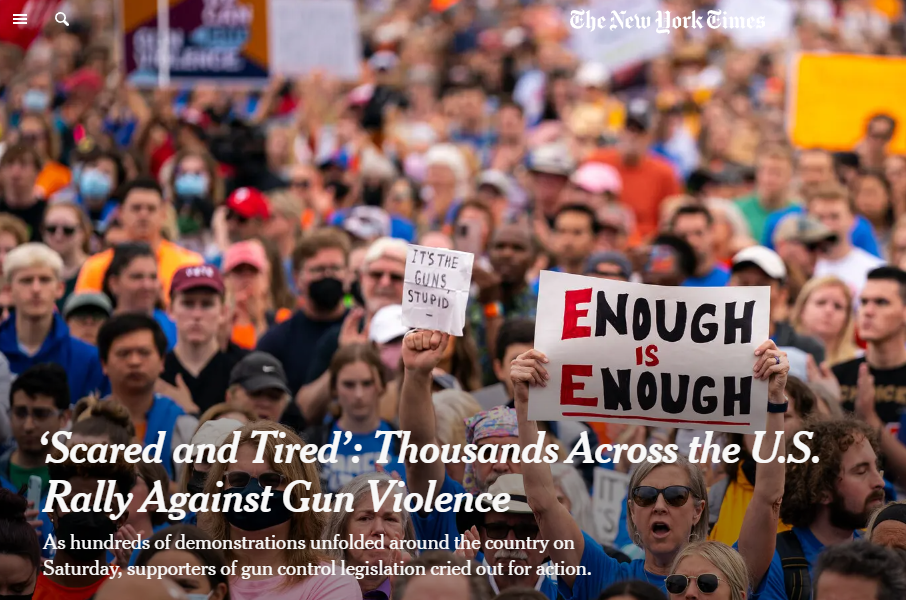

Reference: https://www.nytimes.com/2022/06/11/us/gun-violence-protests.html

In [45]:
# Getting the last 5 years known and unknown perpetrator data
unknown_perp = df_nypd_data.loc[(df_nypd_data['Perp_Age_Group'] == '-1') & (df_nypd_data['Perp_Sex'] == 'U') &  (df_nypd_data['Perp_Race'] == 'UNKNOWN') & (df_nypd_data['Year'] > 2016)]
known_perp = df_nypd_data.loc[(df_nypd_data['Perp_Age_Group'] != '-1') & (df_nypd_data['Perp_Sex'] != 'U') &  (df_nypd_data['Perp_Race'] != 'UNKNOWN') & (df_nypd_data['Year'] > 2016)]

In [46]:
# Entering the mapbox token here!
mapbox_access_token = 'pk.eyJ1IjoiYWtzaGFyMTA2OSIsImEiOiJjbGFsajBteDYwNDEyM3dwZHFlNGh1eHBnIn0.zFxe6wSiNSw64DTUMoWvLA'

In [47]:
# Appending all the unknown perp data based on the year into a single list so that we can display multiple years data into 1 map
unknown_yearList = unknown_perp.Year.sort_values().unique()
unknown_perp_data = []
yearList = unknown_yearList.tolist()
for i in unknown_yearList:
    unknown_perp_year_wise = unknown_perp[unknown_perp['Year'] == i]
    unknown_perp_data.append(unknown_perp_year_wise)

# Appending all the known perp data based on the year into a single list so that we can display multiple years data into 1 map
known_yearList = known_perp.Year.sort_values().unique()

known_perp_data = []
known_yearList = known_yearList.tolist()
for i in known_yearList:
    known_perp_year_wise = known_perp[known_perp['Year'] == i]
    known_perp_data.append(known_perp_year_wise)

In [48]:
# Generating multiple scattermapbox which are later appended into a list so that we can plot them directly on a single map. 
unknown_Perp_Map_Data = []

for unknown_perp_year_data, year in zip(unknown_perp_data, yearList):
    scatterMapBox = go.Scattermapbox(lon = unknown_perp_year_data['Longitude'], lat = unknown_perp_year_data['Latitude'],
                         hoverinfo='text',
                         mode = 'markers',
                         name = year,
                         legendgroup = 'Unknown',
                         legendgrouptitle_text = 'Unknown',
                         marker = dict(symbol = 'circle', color = 'red', opacity = 0.3, allowoverlap = False)
                         )
    unknown_Perp_Map_Data.append(scatterMapBox)

In [49]:
# Generating the layout for the map, by default it showsworld map. Therefore need to pass a center which will depict the map according to our plot. 
# Also passing some margins, so that we can only see the relevent map.
map_layout = go.Layout(
        title = 'Total known vs unknown perpetrator details at the time of incident reporting for last 5 years',
        autosize=True,
        mapbox=go.layout.Mapbox(
            accesstoken= mapbox_access_token,
            zoom = 10,
            center = dict(
            lat = 40.681318,
            lon = -73.956509
            )
        ),        
        height = 800,
        margin = {"r":30,"t":50,"l":100,"b":80}
    )

gun_violence_map = go.Figure(data = unknown_Perp_Map_Data, layout= map_layout)

# Adding new traces to the existing map so that we can filter the output later on as required.
for known_violence_year_data, known_year in zip(known_perp_data, known_yearList):
    scatterMapBox = go.Scattermapbox(lon = known_violence_year_data['Longitude'], lat = known_violence_year_data['Latitude'],
                         hoverinfo='text',
                         mode = 'markers',
                         name = known_year,
                         legendgroup = 'Known',
                         legendgrouptitle_text = 'Known',
                         marker = dict(symbol = 'circle', color = 'blue', opacity = 0.3, allowoverlap = False)
                         )
    gun_violence_map.add_trace(scatterMapBox)

gun_violence_map.update_layout(legend=dict(groupclick="toggleitem"))
gun_violence_map.show()

It is evident from the above visualisation that during the previous five years, gunshot incidents have been concentrated more in the Brooklyn, Bronx, and Queens region of NYC. This trend is similar in both the cases, i.e. when the characterstics of the perpetrator are known and unknown. 

Thus, NYPD must rigorusly work to reduce the number of these incidents in these regions. The NYPD can redistribute their resources and personnel among these boroughs. They can also increase patrol and survellience in these areas that patrols these areas during peaks hours that a shooting incident is expected to happen. The presence of police can help curb the mental distress that makes people feel unsafe and can also prevent an incident from happening.

## Which group of people (as determined by gender, age group, and race) are at a higher risk of being a victim of shooting incidents in NYC?

In [50]:
# Plotting a tree map, by creating multiple sectors in the tree map
fig = px.treemap(df_nypd_data, path=[px.Constant("All"),'Borough', 'Victim_Race', 'Victim_Age_Group'])
fig.update_traces(root_color="lightblue")
fig.update_layout(margin = dict(t=20, l=5, r=5, b=5))
fig.show()

According to the above characteristic plot, Brooklyn and the Bronx are the two Boroughs with the most shootings, accounting for 69% of the total shootings that occurred in NYC. In each borough, the highest number of victims were from minority groups, especially those in the 18-44 age group. This phenomenon can lead to many social and economic problems. 83% of the victims in Brooklyn are Black.

According to NYC Open Data, Black men are 88 times more likely than white Americans to die from a shooting that traumatizes the entire black community. The black community doesn't feel safe. Any insecurity may lead to social chaos. This will make it more difficult for the government to manage society, and it may also cause social instability. Minority groups may reduce their willingness to go out for consumption. Businesses could lose these customers resulting in lower sales. Over 80% of the victims in NYC are men.

Additionally, black live matter activism supports nearly 524,000 jobs in the United States, according to the Bureau of Land Management's Department of the Interior. It can be seen that since minorities are the most victimized group, the government can continue to actively promote this activity, and then, open up more job opportunities for them. Therefore, while increasing their purchasing power, it can also stabilize society to a certain extent.

Sources: 

https://www.vitalcitynyc.org/vital_signs/gun-violence-in-new-york-city-the-data

https://www.blm.gov/about/data/socioeconomic-impact-report

### We are now going to dive deeper into further analysis for our client- *New York City Council*

## New York City Council has asked for some recommendations on the basis of spatial facets with high gun violence- What are the socioeconomic factors contributing to high gun violence? In order to curb this problem, what solutions can be recommended?

In [51]:
# Displaying borough wise number of incidents
borough_wise_incidents = pd.DataFrame(df_nypd_data['Borough'].value_counts())
borough_wise_incidents.columns = ['Count']
borough_wise_incidents

Count
BROOKLYN       10365
BRONX           7402
QUEENS          3828
MANHATTAN       3265
STATEN ISLAND    736

In [52]:
# Finding the top two boroughs with maximum number of incidents
borough_wise_incidents.nlargest(2,['Count'])

Count
BROOKLYN  10365
BRONX      7402

First, finding the number of incidents in each borough. As seen from the table above, **Brooklyn** and **Bronx** are the boroughs with the highest number of shooting incidents. We will further analyse these two boroughs to find out the locations where higher number of shootings take place.

In [53]:
# Finding unique locations to map them into categories
location = df_nypd_data.Location_Description.unique()

In [54]:
# Creating a map to group the diverse locations into categories which will help to determine the most dangerous locations
dict_map = {'HOSPITAL':'Utility_building','PVT HOUSE':'Residential_Building','LOAN COMPANY':'Utility_building','COMMERCIAL BLDG':'Utility_building','CHECK CASH':'Utility_building','DOCTOR':'Utility_building', 'FACTORY':'Utility_building' , 'GAS STATION':'Utility_building', 'GYM':'Utility_building','SCHOOL':'Utility_building','PHOTO':'Utility_building',' PUBLIC HOUS':'Pub','TELECOMM. STORE':'Utility_building', ' APT BUILD':'Residential_Building','STORAGE FACILITY':'Utility_building','ATM':'Utility_building','BANK':'Utility_building','BAR':'Pub','RESTAURANT':'Eatery','FAST FOOD':'Eatery','HOTEL':'Eatery','SOCIAL CLUB':'Eatery','BEAUTY':'Fashion','JEWELRY STORE':'Fashion','CLOTHING BOUTIQUE':'Fashion','DRY CLEANER':'Fashion','DRUG STORE':'Store','GROCERY':'Store','DEPT STORE':'Store','VARIETY STORE':'Store','SMALL MERCHANT':'Store','LIQUOR STORE':'Pub','VIDEO STORE':'Fashion','CANDY STORE':'Store', 'SUPERMARKET':'Store','SHOE STORE':'Store','CHAIN STORE':'Store'} 
df_nypd_data['Location_Description_grouped'] = df_nypd_data['Location_Description'].map(dict_map) 

In [55]:
# Finding out the number of incidents in each categorized location for Brooklyn borough
df_Brooklyn['Location_Description_grouped'] = df_Brooklyn['Location_Description'].map(dict_map)  
categorized_locations_Brooklyn = pd.DataFrame(df_Brooklyn['Location_Description_grouped'].value_counts())
categorized_locations_Brooklyn.reset_index(inplace=True)
categorized_locations_Brooklyn.columns = ['Categorized Locations- Brooklyn','Count of Incidents']
categorized_locations_Brooklyn

Categorized Locations- Brooklyn  Count of Incidents
0                             Pub                2320
1            Residential_Building                1430
2                           Store                 291
3                          Eatery                 156
4                Utility_building                 154
5                         Fashion                  83

In [56]:
categorized_locations_Brooklyn.nlargest(2,['Count of Incidents'])

Categorized Locations- Brooklyn  Count of Incidents
0                             Pub                2320
1            Residential_Building                1430

In [57]:
# Finding out the number of incidents in each categorized location for Bronx borough
df_Bronx['Location_Description_grouped'] = df_Bronx['Location_Description'].map(dict_map) 
categorized_locations_Bronx = pd.DataFrame(df_Bronx['Location_Description_grouped'].value_counts())
categorized_locations_Bronx.reset_index(inplace=True)
categorized_locations_Bronx.columns = ['Categorized Locations- Bronx','Count of Incidents']
categorized_locations_Bronx

Categorized Locations- Bronx  Count of Incidents
0                          Pub                1273
1         Residential_Building                1096
2                        Store                 195
3             Utility_building                 100
4                       Eatery                 100
5                      Fashion                  33

In [58]:
# Finding out top 2 most dangerous locations in Bronx
categorized_locations_Bronx.nlargest(2,['Count of Incidents'])

Categorized Locations- Bronx  Count of Incidents
0                          Pub                1273
1         Residential_Building                1096

On the basis of mapped categorized locations named as Pub, Residential_Building, Store, Utility_building, Eatery & Fashion, we did further analysis for top 2 boroughs. In both **Brooklyn** and the **Bronx**, we can see that Pub & Residential Buildings are the most dangerous categorized locations. According to this statistic, most shootings take place in bar, liquor store, private house and public house locations.

In [59]:
def create_borodata():
    url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-city-boroughs.geojson"
    response = urlopen(url)
    data_json = json.loads(response.read())
    for i in range(5):
        data_json['features'][i]['id']=int(data_json['features'][i]['properties']['cartodb_id'])
    return data_json

def create_precinctdata():
    
    url = "https://github.com/ayadav1069/NYC_Gun_Shooting_Repository/blob/97b52a220d16e2b57d10a498e424c04949b01f02/Police%20Precincts.geojson?raw=true"
    response = urlopen(url)
    data_json2 = json.loads(response.read())
    
    precinct_crime_data=create_precinct_crime_data(df_nypd_data)
    data_json2 = json.load(open('Police Precincts.geojson','r'))
    for i in range(precinct_crime_data.Reported_Precinct.nunique()-1):
        data_json2['features'][i]['id']=int(data_json2['features'][i]['properties']['precinct'])
    return data_json2
    
def create_borough_crime_data(df_nypd_data):
    borough_count = df_nypd_data.groupby(['Borough'])['Murder_Flag'].count()
    borough_crime_data = pd.DataFrame(borough_count)
    borough_crime_data.reset_index(inplace=True)
    borough_crime_data['ids']= [5,3,4,2,1]
    borough_crime_data['Number of shootings']=borough_crime_data.Murder_Flag
    return borough_crime_data

def create_precinct_crime_data(df_nypd_data):
    precinct_count = df_nypd_data.groupby(['Reported_Precinct'])['Murder_Flag'].count()
    precinct_crime_data = pd.DataFrame(precinct_count)
    precinct_crime_data.reset_index(inplace=True)
    precinct_crime_data['Number of shootings']=precinct_crime_data.Murder_Flag
    return precinct_crime_data

In [ ]:
!pip install dash

In [ ]:
!pip install jupyter_dash

In [62]:
import dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import jupyter_dash
from jupyter_dash import JupyterDash

app = jupyter_dash.JupyterDash()

app.layout = html.Div([
    html.H1('Crime Density by spatial facets',style={'textAlign': 'center', 'color':'brown'}),
    html.H3("View crime density by:"),
    
    dcc.RadioItems(
        id='candidate', 
        options=["Borough", "Precinct"],
        value="Coderre",
        inline=True,
        #style = {'textAlign': 'right'}
    ),
    html.Br(),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("candidate", "value"))
def graph(graph_obj):
    if graph_obj=='Precinct':
        precinct_crime_data=create_precinct_crime_data(df_nypd_data)
        data_json2=create_precinctdata()
        fig=px.choropleth(precinct_crime_data,locations='Reported_Precinct',geojson=data_json2,color='Number of shootings',scope='usa',projection='albers usa')
        fig.update_geos(fitbounds="locations",visible=False)
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        return fig
    else:
        borough_crime_data=create_borough_crime_data(df_nypd_data)
        data_json=create_borodata()
        fig=px.choropleth(borough_crime_data,locations='ids',geojson=data_json,color='Number of shootings',scope='usa',projection='albers usa', hover_name='Borough')
        fig.update_geos(fitbounds="locations",visible=False)
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        return fig

if __name__ == '__main__': 
    app.run_server(mode='inline')

The first visualization above validates our calculations done previously. It concludes that Brooklyn & Bronx are infact the most dangerous boroughs with the highest number of shooting incidents. The range of number of incidents for each borough in NYC ranges from 736 for Staten Island, to 10,365 for Brooklyn. Bronx takes up the second place with 7402 shooting incidents followed by Queens at 3828 and Manhattan at 3265.

By breaking down these boroughs into precincts, the second visualization gives us a more detailed overview. We can observe that the precincts in Brooklyn have been reported the highest number of incidents, the highest being 1470 incidents for precinct 75. In the Bronx and Brooklyn, majority of precincts reported the highest number of incidents, but in Queens, although most precincts reported fewer incidents, precinct 113 has a fairly high number of incidents at 772.

**Cause-** There are a number of socioeconomic factors that might contribute to high gun violence, such as-
* Poverty rate,
* Community distrust,
* Unemployed and Not-in-School Youth,
* Low graduation rate.

**Solutions we recommend-** In order to address this problem, the government can take some steps to increase the number of employment opportunities. As a result, not only will unemployment be reduced, but poverty rates will also be reduced. Additionally, some active programs should be set up to raise people's awareness of equality, anti-racism, and trust. Moreover, the government should promote education and provide means for all to access education.

## What recommendations can we provide to ZeroEyes (a firm that delivers A.I. video gun detection real-time solutions) based on NYC Shooting data? What are the possible locations Zero Eyes can target?

As a backstory, we have a client ZeroEyes who provide an A.I. gun detection video analytics solution that integrates into existing security cameras with a mission to proactively gun-related violence at businesses or public places and they need our recommendations based on NYC shooting data.

Based on our analysis, we can recommend ZeroEyes to expand their business and to increase their sales target by targetting the highly prone locations Newyork boroughs. 

The possible locations of Zero Eyes can target are:

- The above visualisation clearly showed that Bronx and Brooklyn have highest nuber of incidents reported so they should target these 2 boroughs to begin with.

- Going deeper in the boroughs of the Bronx and Brooklyn, the majority of precincts reported the most incidents, but in Queens, although most precincts reported fewer incidents, precinct 113 recorded 772 incidents. As a result, we can initially target precincts in Brooklyn & Bronx, as well as precinct 113 in Queens.

- As a result of analyzing the various locations within precincts, statistics confirm that most shootings occur in bars, liquor stores, private houses, and public places. Therefore, these are the places where ZeroEyes should focus on first.

In [63]:
#Creating a new column for time frame
df_nypd_data['Time Frame'] = df_nypd_data['Occur_Time'].astype('datetime64').dt.hour.floordiv(4).add(1)

# Renaming the values in the new column with a categorical data
new_values = {1 : '12:00 AM - 4:00 AM', 2 : '4:00 AM - 8:00 AM', 3 : '8:00 AM - 12:00 PM', 4 : '12:00 PM - 4:00 PM',
              5 : '4:00 PM - 8:00 PM', 6 : '8:00 PM - 12:00 AM'}  
df_nypd_data = df_nypd_data.replace({"Time Frame": new_values})

# Creating a pivot table on the year and the timeframe
df_pivot = df_nypd_data.pivot_table(values = 'Incident_Key', index='Year', columns='Time Frame', aggfunc='count')
df_timeframe_year = df_pivot.loc[:, list(new_values.values())]

In [64]:
# Creating a list of calender months
calender_list = list(calendar.month_name)

# Creating a pivot table on the month and the timeframe
df_pivot = df_nypd_data.pivot_table(values = 'Incident_Key', index='Month', columns='Time Frame', aggfunc='count')
df_year_timeframe = df_pivot.loc[:, list(new_values.values())]
df_year_timeframe = df_year_timeframe.reindex(calender_list[1:]) # renaming the month name

In [65]:
fig = make_subplots(rows=1, cols =  2)

# build plots to be integrated into sub-plots
figures = [px.imshow(df_year_timeframe, text_auto=True),
        px.imshow(df_timeframe_year, text_auto=True)]

i = 1
# integrated into sub-plots
for f in figures:
    for t in (f.data[::-1]):
        fig.add_trace(t, row= 1, col = i)
        i = i + 1

fig.update_layout(height=800)

From the first plot, it is clear that there are more incidents in the summer i.e. from May to August than in any other month. Additionally, the highest number of events take place between the hours of 12:00 AM and 4:00 AM.

According to the FBI data, the deadliest time of crime starts from midnight to 1:00 am and in the terms of homicide, the figures stay high until 3:00 am. It proofs that at night the safety level of city is the lowest. People are more likely get killed or involved in a gunshot incident at late night. 

What’s more, the violence also highly related to the high temperature. As the temperature raise, the number of violence also raises. Based on Oxygen True Crime, the highest violence crime number occurs from May through August.  People are more likely to have social interaction in summer and more conflict comes out. 


Source: 

https://www.oxygen.com/murdered-by-morning/crime-news/what-time-do-murders-usually-happen-date-month-hour 

https://giffords.org/blog/2019/07/why-deadly-cycles-of-violence-spike-in-the-summer-blog/


It is also evident from the other plot that the peak occurrence times occur between 8:00 PM and 4:00 AM, and that since 2006, the number of events has decreased. However, it has increased over the past two years. In this visualization, we can see it has increased once again by 2020, confirming what we mentioned above that pandemic and its associated social-distancing measures caused an uptick in shootings.

From the above analysis, we can also recommend ZeroEyes to improve its ability to work well at night and help capture events properly during the nighttime surveillance. In addition,they should focus to extend more functions to get detailed results to learn more about events that occur very frequently at night

## Based on previous shooting incidents, what is the expected trend in the number of victims for the following years?

Gun violence is an urgent, complex, and multifaceted problem. Predicting Gun Violence means making an attempt to reduce Gun Violence. Gunshot incident forecasting can help increase prevention efforts and locate resources in more heavily affected locales. The forecasting can help prevent recurring crimes in an area by identifying the patterns of crimes committed. This can also provide insights to help make improvements in our communities to prevent crimes from occurring in the first place. This can help the government serve the society through better education, prevention, and effective response methods. Forecasting will also help creating early warning systems and generate constant vigilance that'll prevent gunshots from happening.

In [66]:
# converting the Occur_Date column to datetime.
df_nypd_data['Occur_Date'] = pd.to_datetime(df_nypd_data['Occur_Date'])

In [67]:
# caculating number of victims/incidents on every date.
date_wise_victim_count = pd.DataFrame(df_nypd_data.groupby(['Occur_Date'])['Murder_Flag'].count())

In [68]:
# counting the number of victims/incidents on a monthly basis by grouping the counts
month_wise_victim_count = date_wise_victim_count.groupby(pd.Grouper(freq='M')).sum()

# renaming the columns for easier understanding.
month_wise_victim_count.rename(columns = { 'Murder_Flag' : 'Number_of_Victims'}, inplace = True)

# converting the column type to float.
month_wise_victim_count['Number_of_Victims'] = month_wise_victim_count['Number_of_Victims'].astype(float)

To do a time series forecasting and choose the accurate model, we need to check a few factors that determine which model to choose. One such factor is stationarity. In simple terms, Stationarity means that the statistical properties of the data remain the same over time. 

To check if the data is stationary or not, we need to check if the data shows a trend(overall rise or fall in the mean) and/or has seasonality(a recurring cycle).

### Checking stationarity

Before applying any model to a time series data, it is extremely crucial to check the stationarity of the data. All time series data can be broken into four components: average value, a trend (i.e. an increasing or decreasing mean), seasonality (i.e. a repeating cyclical pattern), and a residual (random noise). 

statsmodels.tsa contains models and classes that are useful for time series analysis. One such function in statsmodels.tsa is seasonal_decompose. This function decomposes the data into its four core components and plots accordingly.

In [88]:
# decomposing the data and plotting it.
data_decomposition = sm.tsa.seasonal_decompose(month_wise_victim_count['Number_of_Victims'], model='additive')
#decomposed_fig = data_decomposition.plot()
#plt.show()

As seen in the Trend graph above, there is increase then decrease and then an increase in the number of victims. However, there is no clear or constant upward/downward trend in the data. 

Let's check for seasonality.

As we can see from the graph, the data is clearly seasonal, i.e., there is a repeating cyclical pattern. The number of victims increase or decrease in a seasonal manner year by year. Thus, the data clearly has seasonality.

Therefore, since our data has seasonality, it is not stationary.

### Statistical Proof of non-stationarity

From the graph, we can see that the data is not stationary. However, to create a statistical proof of our understanding, we run the adfuller test.

adfuller stands for Augmented-Dickey Fuller Test. It is used to check the stationarity of the data. As we learnt in BUDT730, we can conduct a hypothesis test to check if our data is stationary or not.

Let's consider the following:

**H<sub>0</sub>: The number of victims data above is not stationary.**

**H<sub>a</sub>: The number of victims data above is stationary.**

We can now run the test below and check for ADF and p-value.

If the p-value is greater than 0.05, we fail to reject the null.

If the p-value is not greater than 0.05, we reject the null.

In [85]:
# importing the adfuller function
from statsmodels.tsa.stattools import adfuller

# running the test on our data to get the statstical values.
def ad_test(test_data):
    dftest = adfuller(test_data, autolag = 'AIC')
    # the test returns the value in the form of an array. Thus, accessing the specific values accordingly.
    print("1. ADF: ", dftest[0])
    print("2. P-value: ", dftest[1])
    print("3. Number of Lags:", dftest[2])
    print("4. Number of Observations Used For ADF Regression: ", dftest[3])
    print("5. Critical Values:")
    for key,value in dftest[4].items():
        print("\t",key,":", value)

# calling the ad_test function.
ad_test(month_wise_victim_count['Number_of_Victims'])

1. ADF:  -1.2923395199393426
2. P-value:  0.6326696645383808
3. Number of Lags: 11
4. Number of Observations Used For ADF Regression:  180
5. Critical Values:
	 1% : -3.4672111510631
	 5% : -2.877734766803841
	 10% : -2.575403364197531


Analysis of the above output:

- Analysing ADF value:
    - -1.292 > -3.467: Thus, we fail to reject the null.
    - -1.292 > -2.877: Thus, we fail to reject the null.
    - -1.292 > -2.575: Thus, we fail to reject the null.
- Since the ADF value is greater than critical values at all alpha values, **we fail to reject the null.**

- Analysing P-value value:
    - 0.633 > 0.05: Thus, we fail to reject the null.
    - 0.633 > 0.01: Thus, we fail to reject the null.
    - 0.633 > 0.10: Thus, we fail to reject the null.
- Since the P-value is greater than all alpha values, **we fail to reject the null.**

From graphical as well as statistical analysis, we can clearly see that our data is **not stationary.**

### Applying the ARIMA model

AR (p) - Auto Regression basically uses the previous values to make a decision.

I (d) - Integrated means differencing.

MA (q) - past errors to make a future prediction.

If AR value is 2 that means that we will use the past 2 values to predict the future values.

If our data is not stationary we basically difference it with the previous values to elminate the trend.

If the MA is n that means we use the past n errors to make the prediction.

To find the accurate values for p,d, and q, we run the auto_arima function that checks all possible permutations and combinations and choose the best parameters on the basis of AIC value. The model with the smallest AIC value is the best model.

In [ ]:
!pip install pmdarima

In [72]:
# splitting the data into train and test.
# Keeping the last 4 years data as a testing data.
train_data = month_wise_victim_count[:-48]
test_data = month_wise_victim_count[-48:]

In [73]:
from pmdarima import auto_arima
# applying the auto_arima function on the training data to find accurate p,d, and q values. 
stepwise_fit = auto_arima(train_data['Number_of_Victims'], d=1, error_action='ignore',seasonal=True, trace=True,suppress_warnings=True, stepwise=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1395.994, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1400.056, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1401.560, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1401.659, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1398.075, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1402.016, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1403.326, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1334.660, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1329.497, Time=0.25 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -653.957
Date:                Mon, 05 Dec 2022   AIC                           1321.915
Time:                        16:36:59   BIC                           1342.655
Sample:                    01-31-2006   HQIC                          1330.342
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7378      0.145     11.958      0.000       1.453       2.023
ar.L2         -1.0197      0.247     -4.133      0.000      -1.503      -0.536
ar.L3          0.0177      0.141      0.126      0.900      -0.258       0.293
ma.L1         -2.3755      0.118    -20.118      0.000      -2.607      -2.144
ma.L2          2.0649      0.212      9.752      0.000       1.650       2.480
ma.L3         -0.6292      0.114     -5.537      0.000      -0.852      -0.407
sigma2       510.5578     63.816      8.000      0.000     385.481     635.635
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.28
Prob(Q):                              0.90   Prob(JB):                         0.07
Heteroskedasticity (H):               1.03   Skew:                             0.47
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the results from the above function, the **p,d,q** values are **3,1,3** respectively. Thus, we can now use the built-in arima model and hypertune it with our parameters and train it on the entire dataset. We also give a seasonal order, as there is seasonality in our data.

In [74]:
#training the model on complete dataset.
model=sm.tsa.statespace.SARIMAX(month_wise_victim_count['Number_of_Victims'],order=(3,1,3),seasonal_order=(3,1,3,12))
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45791D+00    |proj g|=  9.12144D-02


 This problem is unconstrained.



At iterate    5    f=  4.43507D+00    |proj g|=  1.17621D-02

At iterate   10    f=  4.38425D+00    |proj g|=  1.06628D-01

At iterate   15    f=  4.36735D+00    |proj g|=  1.48315D-02

At iterate   20    f=  4.36497D+00    |proj g|=  5.01971D-03

At iterate   25    f=  4.36374D+00    |proj g|=  7.94562D-03

At iterate   30    f=  4.36319D+00    |proj g|=  2.28889D-03

At iterate   35    f=  4.36293D+00    |proj g|=  1.87408D-03

At iterate   40    f=  4.36193D+00    |proj g|=  3.43707D-03

At iterate   45    f=  4.36170D+00    |proj g|=  7.98881D-04

At iterate   50    f=  4.36166D+00    |proj g|=  5.58235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Number_of_Victims   No. Observations:                  192
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood                -837.438
Date:                            Mon, 05 Dec 2022   AIC                           1700.876
Time:                                    16:37:14   BIC                           1742.312
Sample:                                01-31-2006   HQIC                          1717.678
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4519      0.525      0.861      0.389      -0.577       1.481
ar.L2          0.7744      0.265      2.923      0.003       0.255       1.294
ar.L3         -0.4689      0.238     -1.968      0.049      -0.936      -0.002
ma.L1         -0.6997      0.625     -1.119      0.263      -1.925       0.526
ma.L2         -0.9497      0.623     -1.524      0.127      -2.171       0.272
ma.L3          0.7359      0.536      1.374      0.169      -0.314       1.785
ar.S.L12      -1.3481      0.977     -1.380      0.168      -3.263       0.566
ar.S.L24      -0.4492      0.953     -0.472      0.637      -2.316       1.418
ar.S.L36      -0.0499      0.207     -0.240      0.810      -0.456       0.357
ma.S.L12       0.4504      2.215      0.203      0.839      -3.891       4.792
ma.S.L24      -0.9264      3.144     -0.295      0.768      -7.088       5.235
ma.S.L36      -0.5102      1.521     -0.335      0.737      -3.492       2.472
sigma2       550.3365   1130.638      0.487      0.626   -1665.674    2766.347
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                75.38
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.89
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can now predict the values in the test data and plot the graph to check the accuracy of our results.

In [75]:
# setting the starting and ending indices for the predict function.
start = len(train_data)
end = len(train_data)+len(test_data)-1
pred =results.predict(start=start, end=end, typ='levels')

Text(0, 0.5, 'Count')

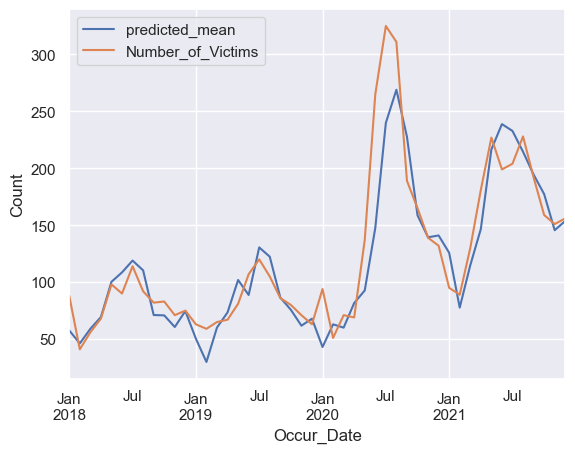

In [90]:
# plotting the expected and predicted values.
#pred.plot(legend=True)
#test_data['Number_of_Victims'].plot(legend=True)
#plt.ylabel('Count')

Using the **coefficient of determination** or **R<sup>2</sup>** score to estimate how perfectly the model can make predictions. The value lies between 0.0 to 1.0 with 0.0 signifying that the model cannot make predictions and 1.0 signifying that the model can make perfect predictions. 

In [77]:
# calculating the r2 score for our model
metrics.r2_score(test_data['Number_of_Victims'], pred)

0.8165404458748085

The **R<sup>2</sup>** score of our model is 0.8165 or **81.65%** which is pretty good. Thus, the model can make fairly accurate predictions.

However, to quantify our error rate, we can calculate the Root Mean Squared Error (RMSE). 

In [78]:
# calculating the rmse value for our model.
rmse = sqrt(mean_squared_error(pred, test_data['Number_of_Victims']))
print(rmse)

28.64221260633604


In [79]:
# to test how good is the rmse we can see the average
test_data['Number_of_Victims'].mean()

122.58333333333333

As we can see, the rmse value is way less than the average of our dataset. Thus, our model's overall performance is good.

In [80]:
#Forecasting data for another 3 years
from pandas.tseries.offsets import DateOffset

# creating month-end dates for the next 3 years.
future_dates=[month_wise_victim_count.index[-1]+ DateOffset(months=x)for x in range(0,36)]

# converting to dataframe to pass in the arima model.
future_datest_arima=pd.DataFrame(index=future_dates[1:],columns=month_wise_victim_count.columns)

# creating a new dataframe that has all the dates of our dataset and new dates for the next 3 years.
month_wise_victim_count['Number_of_Victims'] = month_wise_victim_count['Number_of_Victims'].astype(float)
prediction_values=pd.concat([month_wise_victim_count,future_datest_arima])

# predicting values for the next 3 years.
prediction_values['Forecasted_Number_of_Victims'] = results.predict(start=len(month_wise_victim_count)-2, end=len(prediction_values), typ='levels').round()

In [81]:
# Filling NaN values with -1.
prediction_values.fillna(-1, inplace = True)

# converting column types to int.
prediction_values['Number_of_Victims'] = prediction_values['Number_of_Victims'].astype(int)
prediction_values['Forecasted_Number_of_Victims'] = prediction_values['Forecasted_Number_of_Victims'].astype(int)

# Replacing the value.
prediction_values = prediction_values.replace([-1], np.NaN)

In [82]:
# plotting the predicted and previous value of number of victims.
figure = px.line(prediction_values, x = prediction_values.index, y = prediction_values.columns)

# Updating the layout, adding the labels and the legends
figure.update_layout(
    title= 'Monthly Predicted Trend in the Number of Victims.',
    xaxis_title = 'Months',
    yaxis_title = 'Number of Victims',
    font = dict(
        family = 'Courier New, monospace',
        size = 18,
        color = 'RebeccaPurple'
    )
)

figure.update_layout(autosize=True)
figure.show()

### 